In [1]:
import re
import numpy as np
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

In [2]:
corpus = set()
corpus_sentences = []

with open('data/polish_corpora.txt', encoding="utf8") as f:
    for line in tqdm(f, desc='Loading corpus'):
        line = line.strip().lower()
        corpus_sentences.append(bytearray(line, 'utf8'))
        for word in line.split():
            corpus.add(bytes(word, 'utf8'))

Loading corpus: 23011601it [05:31, 69426.37it/s]


In [3]:
def reconstruct_max_match(text, corpus):
    res = bytearray('', 'utf8')
    valid_words_till_end = [False for _ in range(len(text)+1)]
    valid_words_till_end[-1] = True
    
    max_word_len = np.max(list(map(lambda w: len(w), corpus)))
    
    for start in range(len(text), -1, -1):
        for end in range(start+1, min(start+1+max_word_len, len(text)+1)):
            if bytes(text[start:end]) in corpus and valid_words_till_end[end]:
                valid_words_till_end[start] = True
                break
    
    idx = 0
    while idx < len(text):
        for end in range(min(idx+max_word_len+1, len(text)), idx, -1):
            if bytes(text[idx:end]) in corpus and valid_words_till_end[end]:
                res += text[idx:end] + b' '
                idx = end
    
    return res

In [4]:
def compute_similarity_words(produced, original):
    words_in_original = set(bytes(original).split())
    common_words = words_in_original.intersection(set(bytes(produced).split()))
    return len(common_words) / len(words_in_original)

In [6]:
N = 1000

idxs = np.random.randint(0, len(corpus_sentences), N)
similarities_arr = []

for idx in tqdm(idxs, desc='MaxMatching', position=0, leave=True):
    sentence = corpus_sentences[idx]
    no_spaces = sentence.replace(b' ', b'')
    maxmatch_sentence = reconstruct_max_match(no_spaces, corpus)
    
    similarities_arr.append(compute_similarity_words(maxmatch_sentence, sentence))
    

MaxMatching: 100%|██████████| 1000/1000 [23:57<00:00,  1.44s/it]


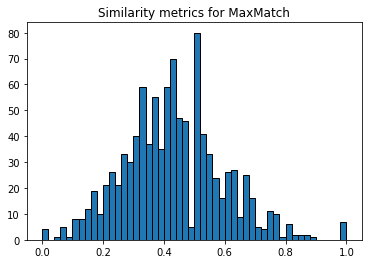

In [7]:
plt.title('Similarity metrics for MaxMatch')
plt.hist(np.array(similarities_arr), bins=50, edgecolor='black')
plt.show()